## Introduction
There are different types of possible splicing sites including (1) 5’ and 3’ splicing cites. These are signals marking the beginning and end of introns. Mutation in these regions can disrupt the splicing process. 
(2) Branch points. Branch points are specific sequences within introns that play a crucial role in the splicing process. (3). Splicing regulatory elements, i.e. exonic/intronic splicing enhancers/silencers. These elements include exonic and intronic splicing enhancers (ESEs and ISEs) and exonic and intronic splicing silencers (ESSs and ISSs).
Enhancers are sequences that promote splicing and are often found in exons and introns. Silencers are sequences that inhibit splicing. 

Single nucleotide variants (SNVs) are the most commonly observed genetic variants in the human genome. These SNVs represent a substantial portion of genetic variation and have the potential to influence splicing. 
Single Nucleotide Variants (SNVs) are the most common type of genetic variation observed in the human genome.
SNVs may occur at canonical splice sites, affecting the recognition of 5' and 3' splice sites by the splicing machinery. This can result in aberrant splicing patterns and the inclusion of intronic sequences in the mature mRNA.
SNVs can create or disrupt splicing enhancers or silencers, affecting the binding of regulatory proteins that control splicing. This alteration in splicing regulatory elements can lead to changes in exon inclusion or exclusion.
SNVs within introns can potentially affect the branch point sequence, impacting the efficiency of the splicing process.

We collect these variants from the healthy cohort
dataset of the Genotype-Tissue Expression project  (GTEx). This dataset consisted of 7,842
RNA-seq samples from 48 tissues of 543 healthy donors.
The data can be downloaded using the Hail API https://hail.is/docs/0.2/datasets.html.

The Genome Aggregation Database (gnomAD) is a comprehensive resource that provides information on genetic variants observed in diverse human populations. GnomAD aggregates data from various large-scale sequencing projects to create a broad picture of genetic variation in different populations. GnomAD includes genetic variants from diverse populations.

GnomAD provides allele frequencies for each variant in different populations. These frequencies indicate the prevalence of a variant within a specific population.

In [1]:
import pandas as pd

gtex_df = pd.read_csv("ALTssDB_5ss.csv")

gtex_df.head(10)

,chromo,strand,start,end,genename,Major_Exon_Size,count,alt5,constitLevel,alt5usageLevel,...,5.ss.Alt.Seq,ALTMaxENT,?MaxEnt,Upstream_intronSize,Downstream_intronSize,Upperstream_intron_gcpct,Exon_gcpct,Downstream_intron_gcpct,Alt5Exon_gcpct,Alt5Downstream_intron_gcpct
0,chr16,-,20627188,20627316,ACSM1,128,5,5,0.5,0.5,...,GAGGTAAGA,10.06,-3.20,9422,1666,0.446667,0.479675,0.493333,0.500000,0.493333
1,chr19,-,45777326,45777590,DMPK,264,12,12,0.5,0.5,...,ATGGTGAGC,8.27,-1.68,76,2292,0.671875,0.640927,0.620000,0.635246,0.600000
2,chr22,-,31937915,31938115,C22orf24,200,5,5,0.5,0.5,...,AAGGTAATG,8.99,-0.31,7117,3466,0.560000,0.471795,0.466667,0.459016,0.473333
3,chr1,-,30950126,30950261,PUM1,135,22,22,0.5,0.5,...,CAGGTAATT,8.55,-0.01,1972,4643,0.366667,0.500000,0.480000,0.500000,0.380000
4,chr16,-,48111577,48111662,ABCC12,85,5,5,0.5,0.5,...,CTGGTATAA,2.20,0.20,113,70,0.534653,0.487500,0.454545,0.507042,0.452830
5,chr16,-,74675323,74675404,MLKL,81,7,7,0.5,0.5,...,AAGGTGAAG,5.73,0.40,16937,223,0.420000,0.500000,0.486667,0.511111,0.513333
6,chr22,-,38487872,38488115,DDX17,243,7,7,0.5,0.5,...,GGGGTAAGG,8.05,2.40,3940,1432,0.453333,0.516807,0.540000,0.512931,0.386667
7,chr6,-,42362946,42363079,TRERF1,133,11,11,0.5,0.5,...,CAGGTCGCT,0.47,4.70,88097,62197,0.593333,0.492188,0.493333,0.512821,0.473333
8,chr7,-,150959571,150959736,KCNH2,165,6,6,0.5,0.5,...,ATGGTGGGG,2.63,8.23,14974,1069,0.673333,0.606250,0.600000,0.525253,0.620000
9,chr4,+,20488818,20488982,SLIT2,164,5,5,0.5,0.5,...,AGAGTGATG,-6.92,15.29,2547,1820,0.266667,0.540881,0.366667,0.534091,0.360000


### Distribution of intron sizes

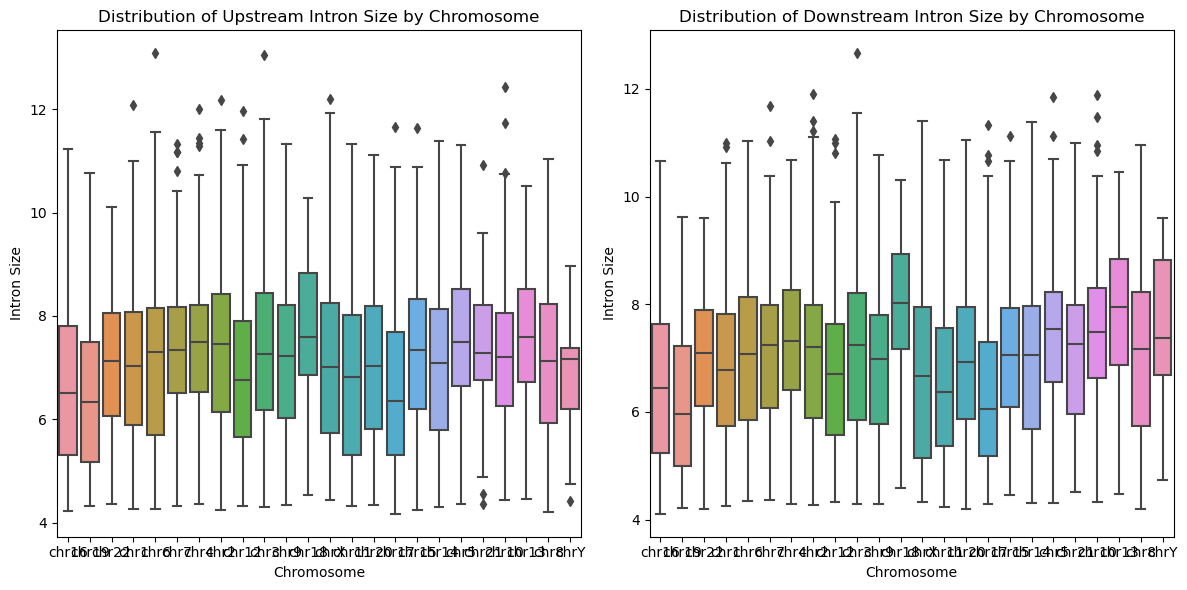

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Chromosome': gtex_df['chromo'].values,
    'Upstream_intronSize': np.log(gtex_df['Upstream_intronSize'].values),
    'Downstream_intronSize': np.log(gtex_df['Downstream_intronSize'].values)
}

df = pd.DataFrame(data)


# Create a boxplot using seaborn
#plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(x='Chromosome', y='Upstream_intronSize', data=df, whis=1.5, ax=axes[0])
axes[0].set_title('Distribution of Upstream Intron Size by Chromosome')
axes[0].set_xlabel('Chromosome')
axes[0].set_ylabel('Intron Size')

sns.boxplot(x='Chromosome', y='Downstream_intronSize', data=df, whis=1.5, ax=axes[1])
axes[1].set_title('Distribution of Downstream Intron Size by Chromosome')
axes[1].set_xlabel('Chromosome')
axes[1].set_ylabel('Intron Size')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Merge with gnomAD population variants dataset

In [3]:
import os

# Replace 'your_folder_path' with the actual path to your folder
folder_path = 'chr'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and append its content to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)
    #break

# Concatenate all DataFrames in the list into a single DataFrame
gnom_df = pd.concat(dfs, ignore_index=True)

print(gnom_df.shape)

gnom_df.head(10)

(113430, 66)


,Unnamed: 0,chromo,strand,start,end,genename,Major_Exon_Size,count,alt5,constitLevel,...,Allele Frequency South Asian,Allele Count Remaining,Allele Number Remaining,Allele Frequency Remaining,Allele Count African/African American,Allele Number African/African American,Allele Frequency African/African American,Allele Count Middle Eastern,Allele Number Middle Eastern,Allele Frequency Middle Eastern
0,0,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2088,0.0,0,41476,0.000000,0.0,316.0,0.000000
1,1,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000207,0,2094,0.0,0,41418,0.000000,0.0,316.0,0.000000
2,2,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2108,0.0,0,41458,0.000000,0.0,294.0,0.000000
3,3,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41390,0.000024,0.0,316.0,0.000000
4,4,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2090,0.0,1,41418,0.000024,0.0,316.0,0.000000
5,5,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41404,0.000024,0.0,316.0,0.000000
6,6,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2112,0.0,0,41526,0.000000,1.0,294.0,0.003401
7,7,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2090,0.0,1,41406,0.000024,0.0,316.0,0.000000
8,8,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41448,0.000024,0.0,316.0,0.000000
9,9,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,5,41412,0.000121,0.0,316.0,0.000000


In [4]:
gnom_df.columns

Index(['Unnamed: 0', 'chromo', 'strand', 'start', 'end', 'genename',
       'Major_Exon_Size', 'count', 'alt5', 'constitLevel', 'alt5usageLevel',
       'alt5singleCount', 'alt5singleLoc', 'Alt_Exon_Size', '5.ss.Con',
       '5.ss.Seq', 'MaxENT', '5.ss.Alt', '5.ss.Alt.Seq', 'ALTMaxENT',
       '?MaxEnt', 'Upstream_intronSize', 'Downstream_intronSize',
       'Upperstream_intron_gcpct', 'Exon_gcpct', 'Downstream_intron_gcpct',
       'Alt5Exon_gcpct', 'Alt5Downstream_intron_gcpct', 'Chromosome',
       'Position', 'rsIDs', 'Reference', 'Alternate', 'Allele Count',
       'Allele Number', 'Allele Frequency', 'Allele Count Amish',
       'Allele Number Amish', 'Allele Frequency Amish',
       'Allele Count Admixed American', 'Allele Number Admixed American',
       'Allele Frequency Admixed American', 'Allele Count Ashkenazi Jewish',
       'Allele Number Ashkenazi Jewish', 'Allele Frequency Ashkenazi Jewish',
       'Allele Count East Asian', 'Allele Number East Asian',
       'Allele Fr

In [5]:
merged_df = gnom_df

In [15]:
merged_df.shape

(113430, 66)

### Compute Allele frequency for difference races

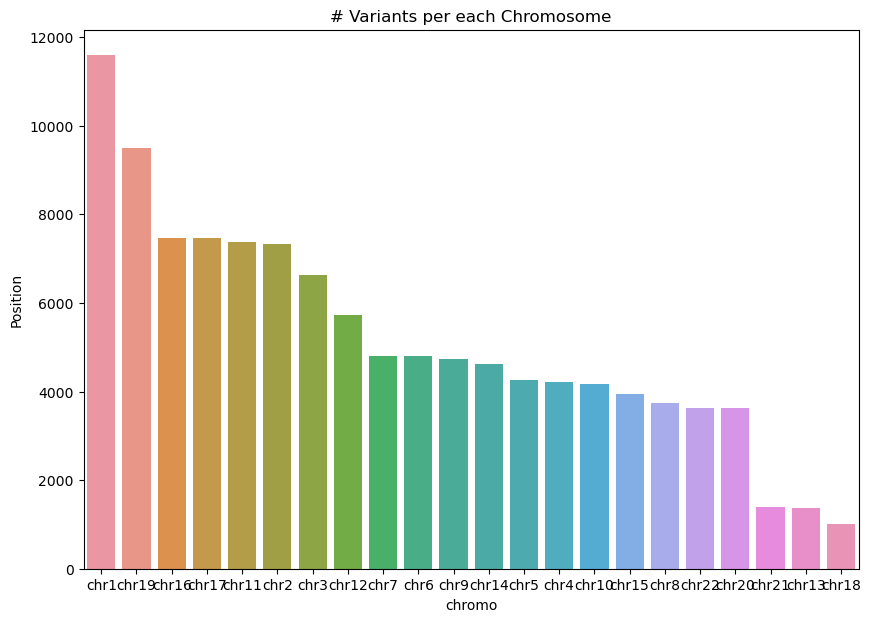

In [39]:
df = merged_df.groupby(['chromo']).count()['Position'].sort_values(ascending=False).reset_index()
# Bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x = 'chromo', y = 'Position', data = df)

# Set labels for the plot
plt.title('# Variants per each Chromosome')
plt.show()

In [41]:
merged_df.groupby(['chromo']).count()[['Position']].head(10)

,Position
chromo,
chr1,11587
chr10,4180
chr11,7378
chr12,5737
chr13,1363
chr14,4623
chr15,3945
chr16,7471
chr17,7465


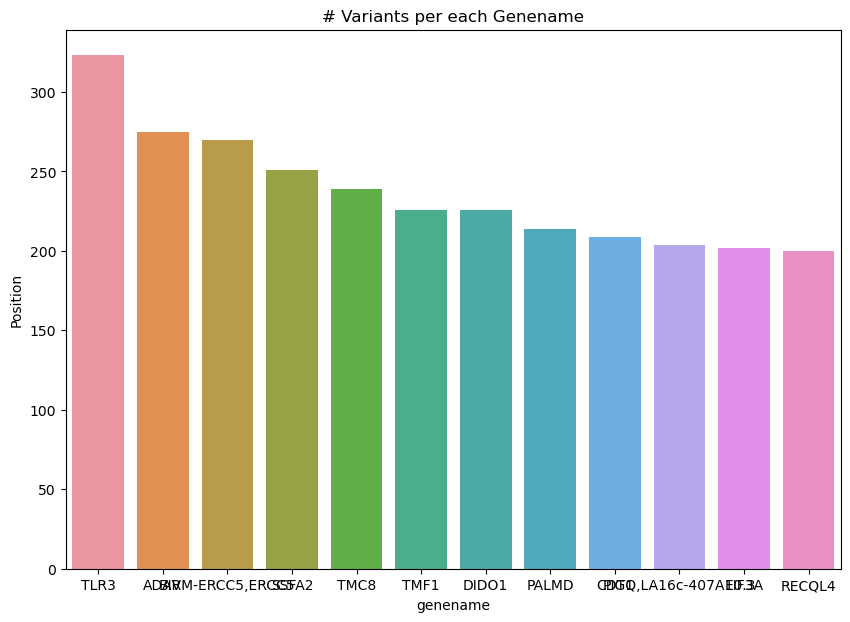

In [51]:
df = merged_df.groupby(['genename']).count()['Position'].sort_values(ascending=False).reset_index()
# Bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x = 'genename', y = 'Position', data = df.head(12))

# Set labels for the plot
plt.title('# Variants per each Genename')
plt.show()

### The average number of variants per gene is 28.

In [52]:
df['Position'].describe()

count    3231.000000
mean       35.106778
std        28.710297
min         1.000000
25%        17.000000
50%        28.000000
75%        43.000000
max       323.000000
Name: Position, dtype: float64

### Gene with the highest number of variants is TLR3, which lies in Chromsome 4.

In [53]:
df.head(10)

,genename,Position
0,TLR3,323
1,ADAR,275
2,"BIVM-ERCC5,ERCC5",270
3,SSFA2,251
4,TMC8,239
5,TMF1,226
6,DIDO1,226
7,PALMD,214
8,CDT1,209
9,"PIGQ,LA16c-407A10.3",204


In [54]:
hf = merged_df[merged_df['genename'] == df['genename'].iloc[0]][['chromo', 'genename', 'Position', 'Allele Frequency']]

hf.head()

,chromo,genename,Position,Allele Frequency
90698,chr4,TLR3,186082319,0.000000
90699,chr4,TLR3,186082324,0.000015
90700,chr4,TLR3,186082330,0.000000
90701,chr4,TLR3,186082335,0.000007
90702,chr4,TLR3,186082341,0.000034


In [108]:
merged_df['Allele Frequency Admixed American']  = merged_df['Allele Count Admixed American'] / merged_df['Allele Number Admixed American']

merged_df['Allele Frequency African/African American']  = merged_df['Allele Count African/African American'] / merged_df['Allele Number African/African American']

merged_df['Allele Frequency Ashkenazi Jewish']  = merged_df['Allele Count Ashkenazi Jewish'] / merged_df['Allele Number Ashkenazi Jewish']

merged_df['Allele Frequency East Asian']  = merged_df['Allele Count East Asian'] / merged_df['Allele Number East Asian']

merged_df['Allele Frequency Middle Eastern']  = merged_df['Allele Count Middle Eastern'] / merged_df['Allele Number Middle Eastern']

merged_df['Allele Frequency Amish']  = merged_df['Allele Count Amish'] / merged_df['Allele Number Amish']

merged_df['Allele Frequency South Asian']  = merged_df['Allele Count South Asian'] / merged_df['Allele Number South Asian']

merged_df['Allele Frequency European (Finnish)']  = merged_df['Allele Count European (Finnish)'] / merged_df['Allele Number European (Finnish)']

merged_df['Allele Frequency European (non-Finnish)']  = merged_df['Allele Count European (non-Finnish)'] / merged_df['Allele Number European (non-Finnish)']

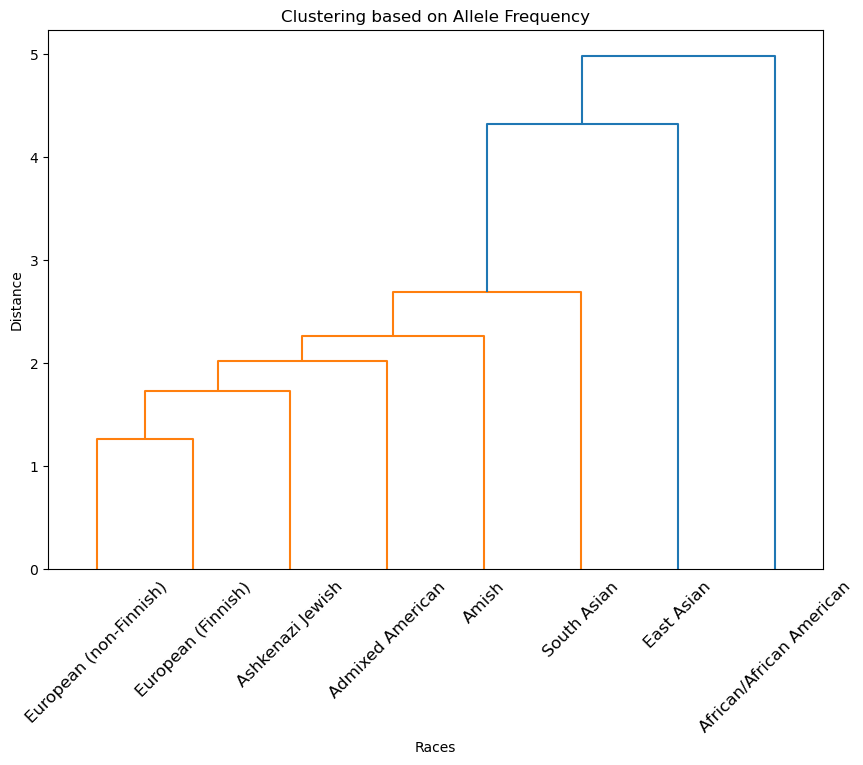

In [110]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

# Example DataFrame creation
data = {
    x: merged_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Calculate hierarchical clustering
linkage_matrix = linkage(df.transpose(), method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.columns, orientation='top', distance_sort='descending')
plt.title('Clustering based on Allele Frequency')
plt.xlabel('Races')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()


#### It is natural to ask what are the differential genes that make the allele frequency of variants outstanding in certain races. From the chart below we see the gene FAM3B makes Amish different from other races.

### Differential genes on Chromosome 4

<Figure size 900x600 with 0 Axes>

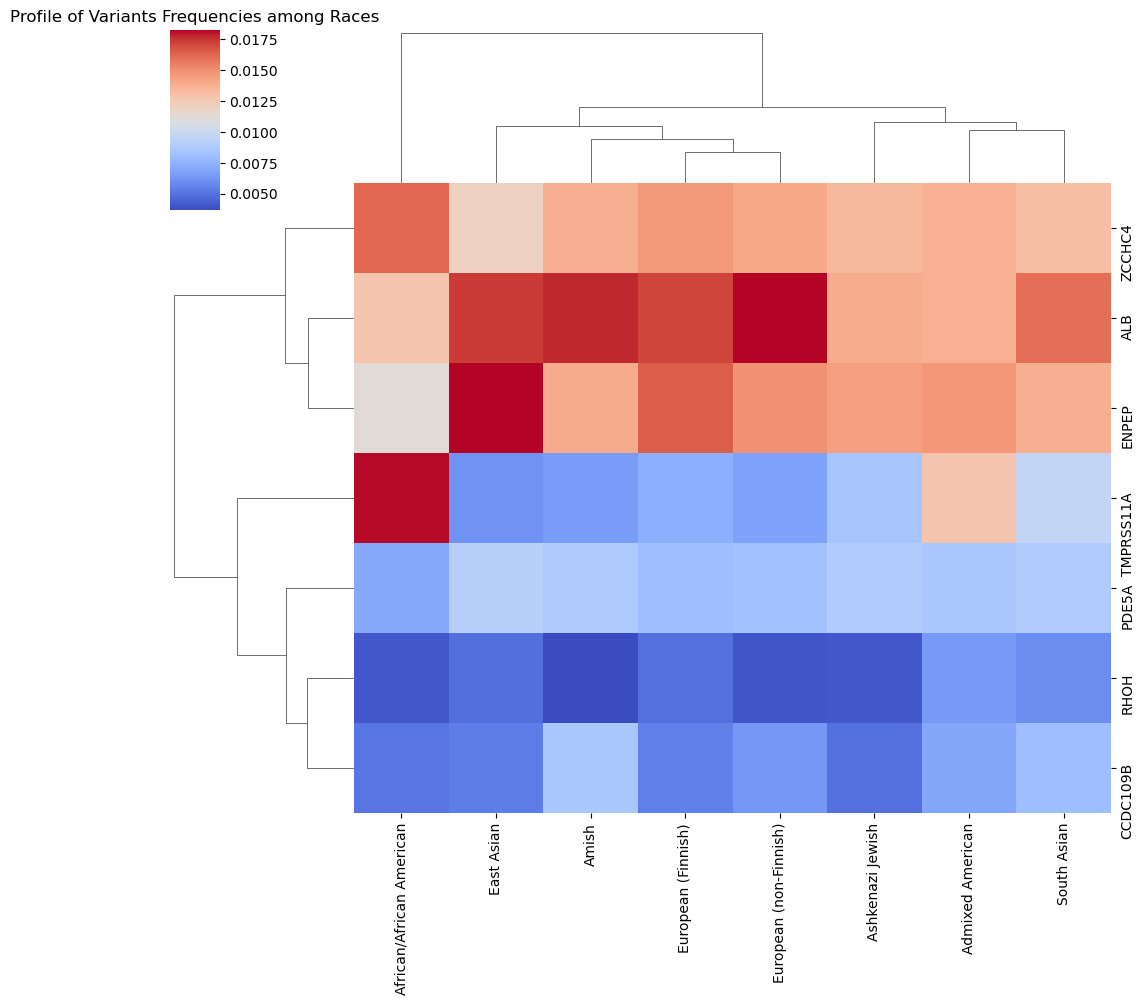

In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

genenames = merged_df[merged_df['chromo'] == 'chr4']['genename'].unique()

# Example DataFrame creation
data = {
    x: [merged_df[merged_df['genename'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the cutoff value based on the percentage of max_af
cutoff = max_af * percentage_cutoff

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

### Differential genes on Chromosome 1

<Figure size 900x600 with 0 Axes>

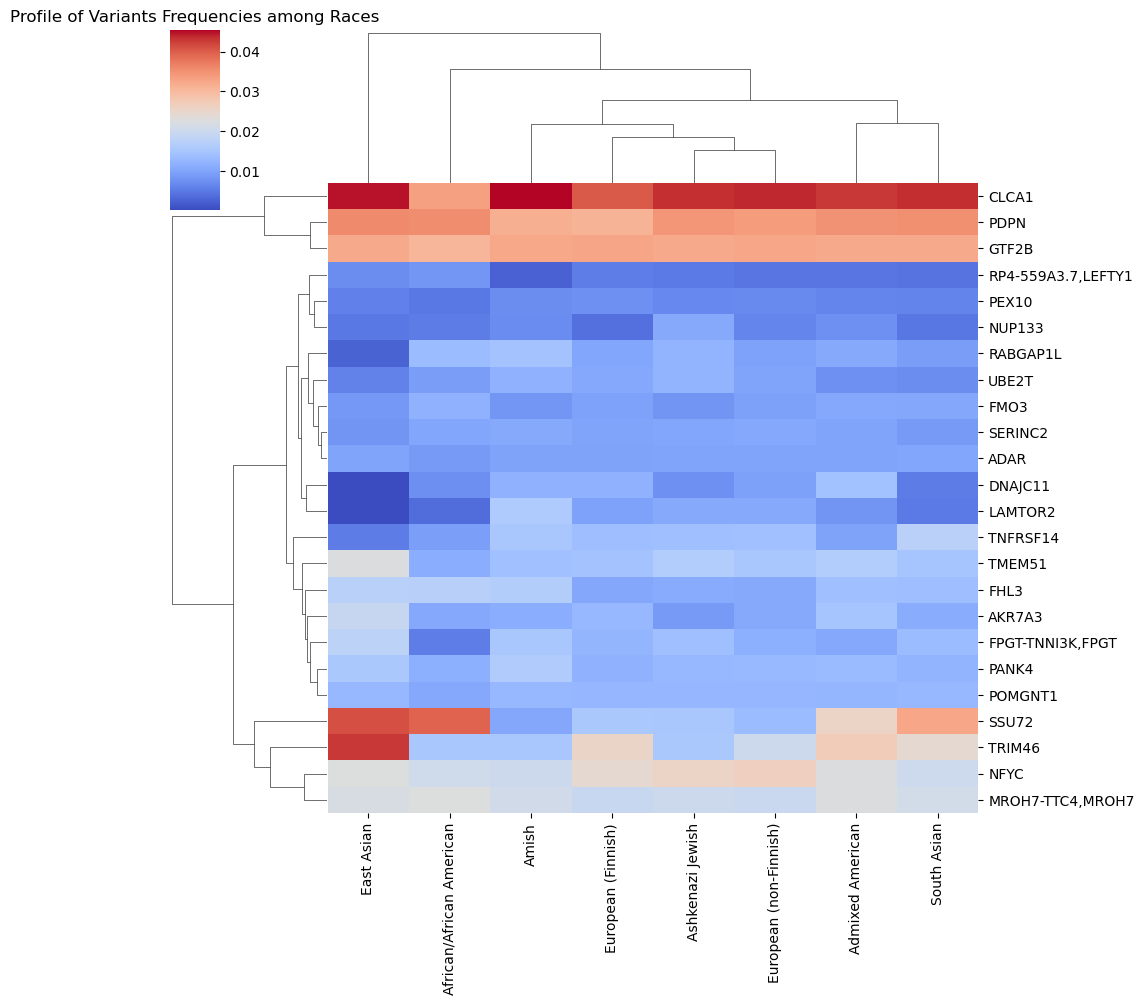

In [68]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

genenames = merged_df[merged_df['chromo'] == 'chr1']['genename'].unique()

# Example DataFrame creation
data = {
    x: [merged_df[merged_df['genename'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the cutoff value based on the percentage of max_af
cutoff = max_af * percentage_cutoff

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

### Differential genes on Chromosome 19

<Figure size 900x600 with 0 Axes>

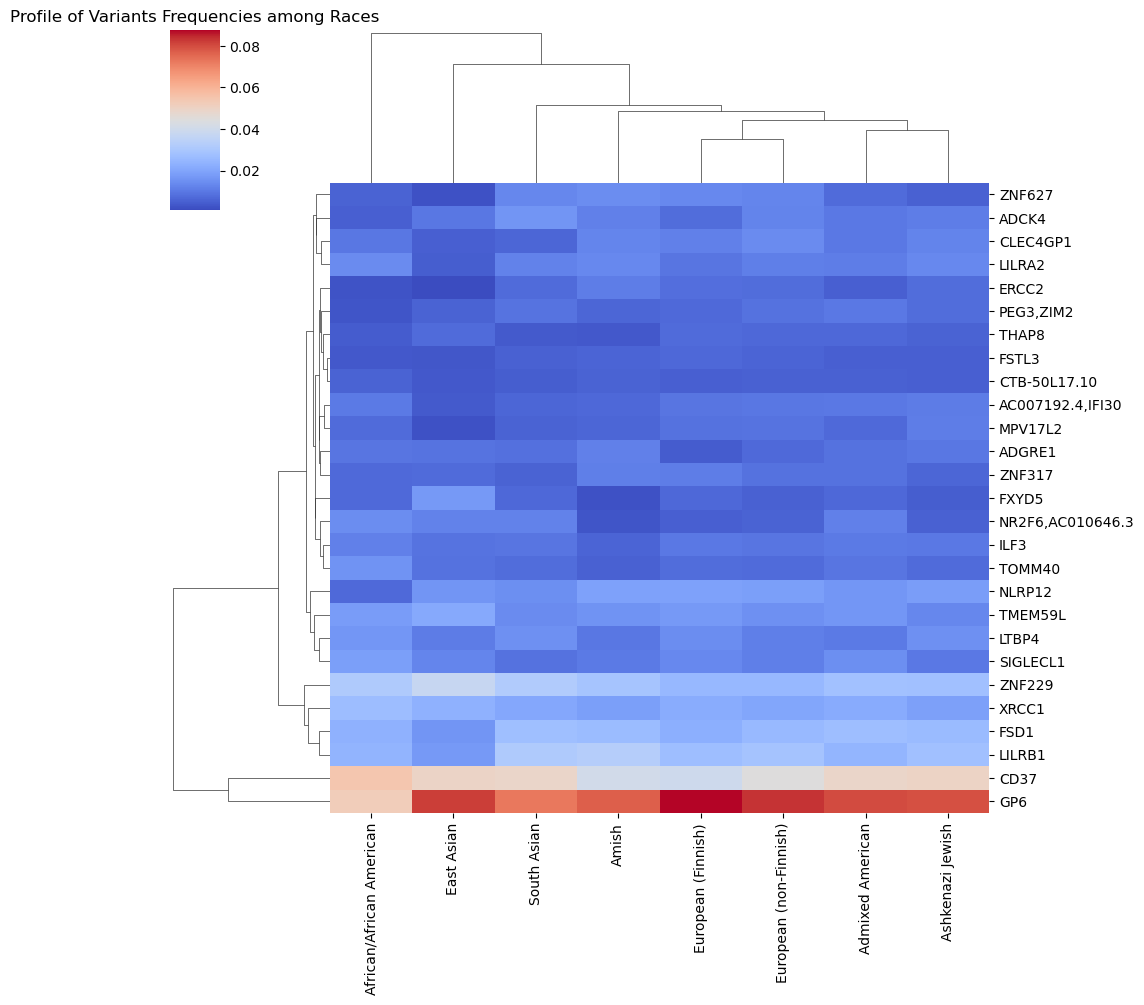

In [70]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

genenames = merged_df[merged_df['chromo'] == 'chr19']['genename'].unique()

# Example DataFrame creation
data = {
    x: [merged_df[merged_df['genename'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)



# Calculate the maximum allele frequency across all variants and populations
max_af = df.max().max()

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the cutoff value based on the percentage of max_af
cutoff = max_af * percentage_cutoff

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

### Differential genes on Chromosome 22

<Figure size 900x600 with 0 Axes>

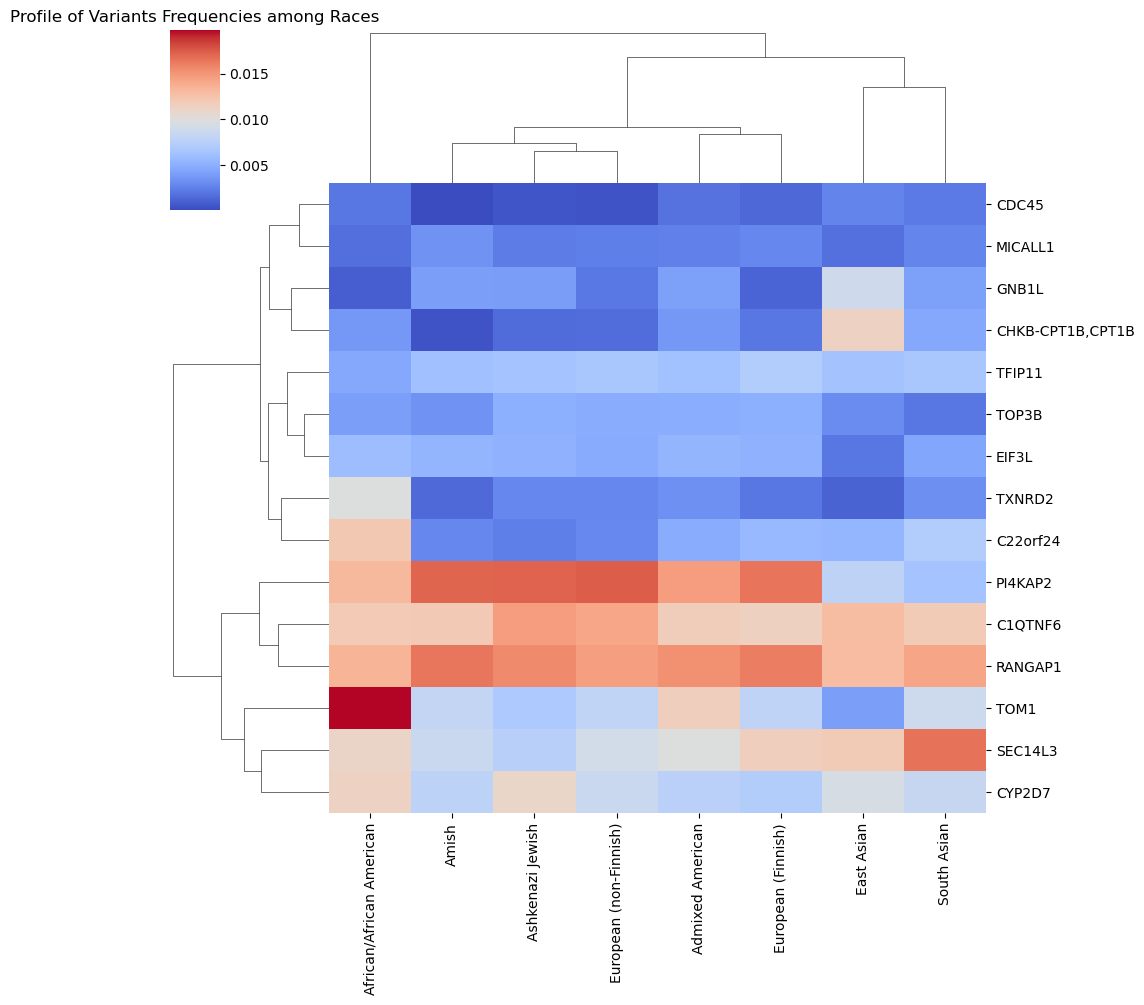

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

genenames = merged_df[merged_df['chromo'] == 'chr22']['genename'].unique()

# Example DataFrame creation
data = {
    x: [merged_df[merged_df['genename'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)



# Calculate the maximum allele frequency across all variants and populations
max_af = df.max().max()

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the cutoff value based on the percentage of max_af
cutoff = max_af * percentage_cutoff

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

### Differential genes on Chromosome 20

<Figure size 900x600 with 0 Axes>

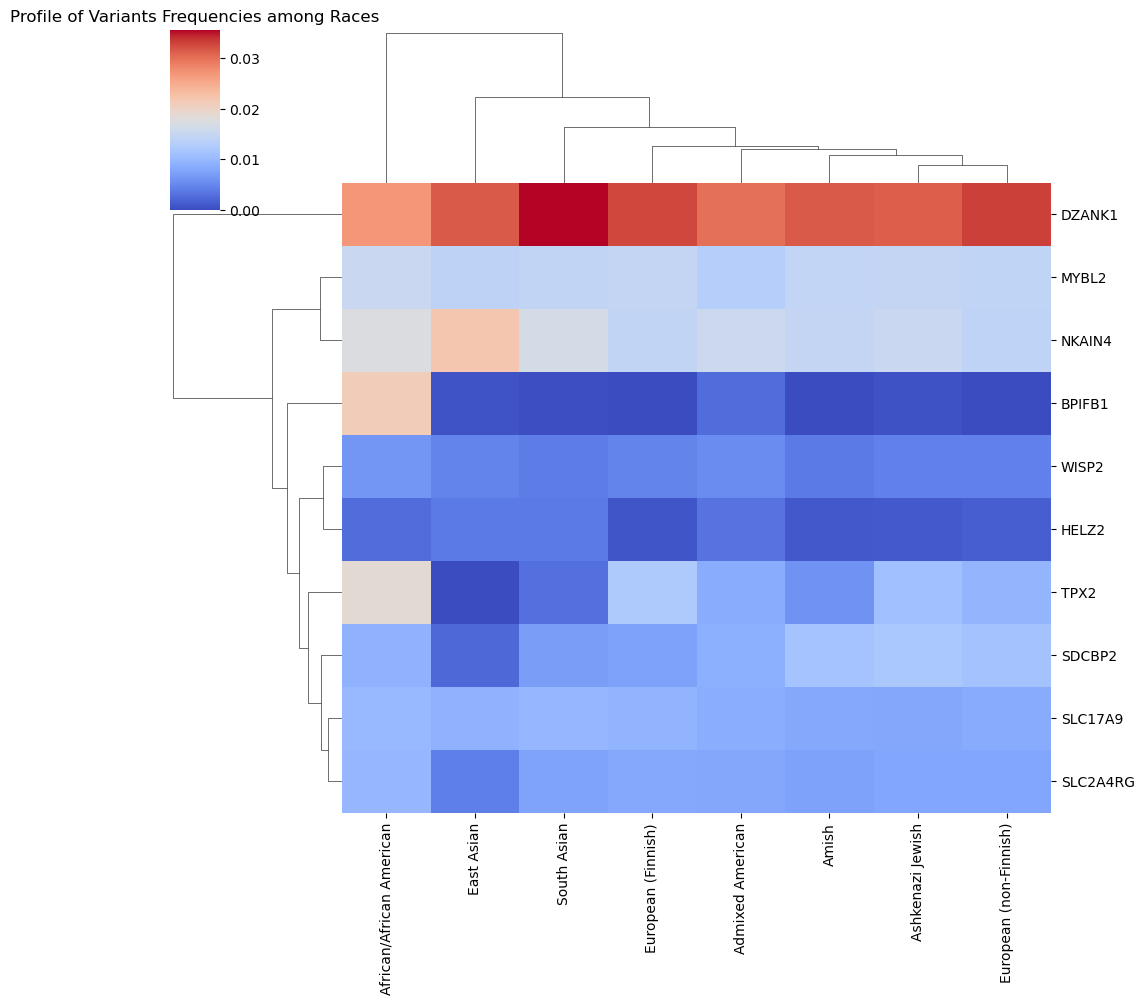

In [73]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

genenames = merged_df[merged_df['chromo'] == 'chr20']['genename'].unique()

# Example DataFrame creation
data = {
    x: [merged_df[merged_df['genename'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)



# Calculate the maximum allele frequency across all variants and populations
max_af = df.max().max()

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the cutoff value based on the percentage of max_af
cutoff = max_af * percentage_cutoff

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()